<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Inspect-the-data" data-toc-modified-id="Inspect-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Inspect the data</a></span></li><li><span><a href="#Type-of-Emergency" data-toc-modified-id="Type-of-Emergency-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Type of Emergency</a></span></li><li><span><a href="#Reason-for-the-emergency" data-toc-modified-id="Reason-for-the-emergency-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reason for the emergency</a></span></li><li><span><a href="#Date,Month,Day-and-Hour-of-the-call" data-toc-modified-id="Date,Month,Day-and-Hour-of-the-call-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Date,Month,Day and Hour of the call</a></span><ul class="toc-item"><li><span><a href="#Changing-the-timeStamp-data-type" data-toc-modified-id="Changing-the-timeStamp-data-type-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Changing the timeStamp data type</a></span></li><li><span><a href="#Extraction-of-the-date,year,month,day-and-hour" data-toc-modified-id="Extraction-of-the-date,year,month,day-and-hour-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Extraction of the date,year,month,day and hour</a></span></li><li><span><a href="#Extracting-data-on-the-top-3-reasons-for-each-emergency-type" data-toc-modified-id="Extracting-data-on-the-top-3-reasons-for-each-emergency-type-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Extracting data on the top 3 reasons for each emergency type</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Top-5-Zip-codes-for-911-calls" data-toc-modified-id="Top-5-Zip-codes-for-911-calls-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Top 5 Zip-codes for 911 calls</a></span></li><li><span><a href="#Top-5-Townships-for-911-calls" data-toc-modified-id="Top-5-Townships-for-911-calls-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Top 5 Townships for 911 calls</a></span></li><li><span><a href="#Emergencies-by-Type" data-toc-modified-id="Emergencies-by-Type-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Emergencies by Type</a></span></li><li><span><a href="#Emergencies-across-the-time-period" data-toc-modified-id="Emergencies-across-the-time-period-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Emergencies across the time period</a></span></li><li><span><a href="#Emergencies-by-type-across-the-time-period" data-toc-modified-id="Emergencies-by-type-across-the-time-period-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Emergencies by type across the time period</a></span></li><li><span><a href="#Linear-Trend-of-the-Number-of-Calls-across-the-Time-Period" data-toc-modified-id="Linear-Trend-of-the-Number-of-Calls-across-the-Time-Period-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Linear Trend of the Number of Calls across the Time Period</a></span></li><li><span><a href="#Relationship-between-Day-of-the-week-and-Hour" data-toc-modified-id="Relationship-between-Day-of-the-week-and-Hour-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Relationship between Day of the week and Hour</a></span></li><li><span><a href="#Relationship-between-Day-of-the-week-and-Month" data-toc-modified-id="Relationship-between-Day-of-the-week-and-Month-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Relationship between Day of the week and Month</a></span></li><li><span><a href="#Reasons-for-Emergency-calls" data-toc-modified-id="Reasons-for-Emergency-calls-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>Reasons for Emergency calls</a></span></li></ul></li></ul></div>


# Introduction

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


# Data and Setup
We will need to import the necessary packages to complete this project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import calendar
from datetime import datetime

After loading the necessary libraries, we will have to load the data

In [2]:
calls = pd.read_csv('911.csv')

## Inspect the data

In [3]:
calls

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
calls['twp'].nunique()

68

The dataset contains data on 99,492 emergency calls made from 68 townships from December 2015 to August 2016. 

# Process
## Type of Emergency
We will need to know the type of the emergency. In order to create a new column to know each type, we will separate the strings in the title column.

In [6]:
calls['type'] = calls['title'].apply(lambda x: x.split(':')[0])
calls['type'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

There are three categories of emergency calls which; EMS,Fire and Traffic.

## Reason for the emergency
Across the three types of emergency, there are different reasons for the call. Let's get that information

In [7]:
calls['reason'] = calls['title'].apply(lambda x: x.split(':')[1])
calls['reason'].nunique()

81

There are 81 reasons for emergency calls across the three types of emergencies.

## Date,Month,Day and Hour of the call
### Changing the timeStamp data type
Upon inspection of the timeStamp column ,we notice that it is in a string format instead of a datetime format.

In [8]:
type(calls['timeStamp'].iloc[0])

str

We will need to convert the timeStamp column to a datetime data type from a string

In [9]:
calls['timeStamp'] = pd.to_datetime(calls['timeStamp'])

In [10]:
type(calls['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

### Extraction of the date,year,month,day and hour
We need to extract the hour,day and month each call was made from the timestamp column

In [11]:

calls['monthnum'] = calls['timeStamp'].apply(lambda x: x.month) # To extract the number of the month
calls['month'] = calls['monthnum'].apply(lambda x: calendar.month_name[x]) # Change month number to month name


calls['day'] = calls['timeStamp'].apply(lambda x: x.dayofweek) # To extract the day number of the week
calls['day'] = calls['day'].apply(lambda x: calendar.day_name[x]) # Change day number to day name


calls['date'] = calls['timeStamp'].apply(lambda x:x.date()) # To extract the date

calls['year'] = calls['timeStamp'].apply(lambda x: x.year) #To extract the year
calls['month'] = calls['month'].astype(str) +' '+ calls['year'].astype(str) # Concatenate month and year

calls['hour'] = calls['timeStamp'].apply(lambda x: x.hour) #To extract the hour

### Extracting data on the top 3 reasons for each emergency type
First we would need to determine the top 2 reasons for each emergency type

In [63]:
calls['title'].value_counts().head(18)

Traffic: VEHICLE ACCIDENT -       23066
Traffic: DISABLED VEHICLE -        7702
Fire: FIRE ALARM                   5496
EMS: RESPIRATORY EMERGENCY         5112
EMS: CARDIAC EMERGENCY             5012
EMS: FALL VICTIM                   4863
EMS: VEHICLE ACCIDENT              3935
Traffic: ROAD OBSTRUCTION -        3144
EMS: SUBJECT IN PAIN               2687
EMS: HEAD INJURY                   2631
EMS: UNKNOWN MEDICAL EMERGENCY     1873
EMS: SYNCOPAL EPISODE              1717
Fire: VEHICLE ACCIDENT             1638
EMS: SEIZURES                      1630
EMS: GENERAL WEAKNESS              1464
Fire: FIRE INVESTIGATION           1460
EMS: ABDOMINAL PAINS               1436
EMS: ALTERED MENTAL STATUS         1386
Name: title, dtype: int64

Respiratory and cardiac emergency are the top reasons for EMS calls, Vehicle accident and Disabled vehicle are the top reasons for Traffic calls and Fire alarm and Vehicle accident are the top reasons for Fire calls.

In [65]:
emsRes = calls[(calls['title'] == 'EMS: RESPIRATORY EMERGENCY')] # Data on Respiratory Emergency
emsCar = calls[(calls['title'] == 'EMS: CARDIAC EMERGENCY')] # Data on Cardiac Emergency
emsFal = calls[(calls['title'] == 'EMS: FALL VICTIM')] # Data on Fall victim


traVeh = calls[(calls['title'] == 'Traffic: VEHICLE ACCIDENT -')] # Data on Vehicle Accident
traDis = calls[(calls['title'] == 'Traffic: DISABLED VEHICLE -')] # Data on Disabled Vehicle
traRoa = calls[(calls['title'] == 'Traffic: ROAD OBSTRUCTION -')] # Data on Road Obstruction


firFir = calls[(calls['title'] == 'Fire: FIRE ALARM')] # Data on Fire alarm
firVeh = calls[(calls['title'] == 'Fire: VEHICLE ACCIDENT')] # Data on Vehicle accident
firInv = calls[(calls['title'] == 'Fire: FIRE INVESTIGATION')] # Data on Fire investigation

## Analysis
In this section, we are going to run visual analysis of our data in order to get different insights.

###  Top 5 Zip-codes for 911 calls
From our data, we want to know the top 5 zip-codes for 911 calls

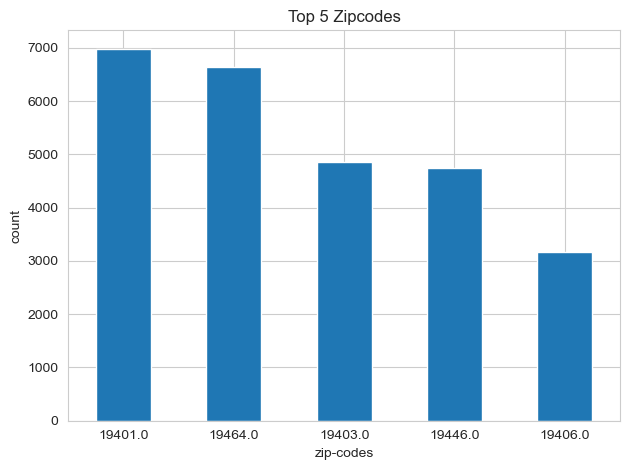

In [12]:
top5zip = calls['zip'].value_counts().head(5).plot.bar(title='Top 5 Zipcodes',rot=0)
top5zip.set(xlabel='zip-codes',ylabel='count')
plt.tight_layout()

### Top 5 Townships for 911 calls
From our data, we want to know the top 5 Townships for 911 calls

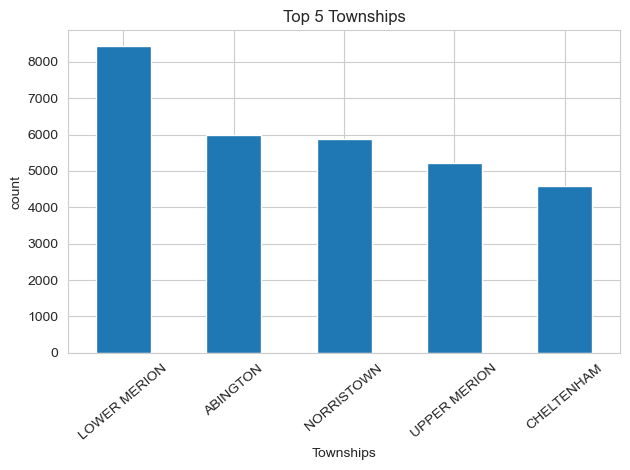

In [13]:
top5town = calls['twp'].value_counts().head(5).plot.bar(title='Top 5 Townships',rot=40)
top5town.set(xlabel='Townships',ylabel='count')
plt.tight_layout()

### Emergencies by Type
The graph below shows the number of emergencies by type

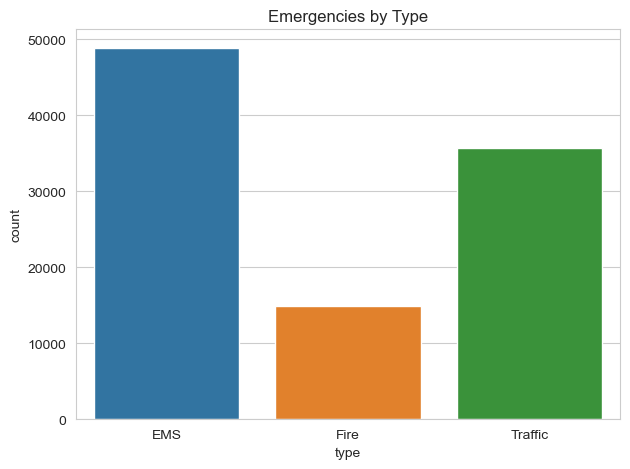

In [14]:
sns.countplot(x='type' , data=calls)
plt.title('Emergencies by Type')
plt.tight_layout()

EMS made up most of the calls made from December 2015-August 2016. Followed by Traffic and Fire.

### Emergencies across the time period
The graph below shows the number of emergencies across the time period

In [15]:
custom_dict = {'December 2015': 0, 'January 2016': 1, 'February 2016': 2, 'March 2016': 3,
               'April 2016': 4, 'May 2016': 5, 'June 2016': 6, 'July 2016': 7, 'June 2016': 8, 'August 2016': 9}
            # Arrange the data by months
    
NumEme = calls.groupby('month').count().sort_values(
    'month', key=lambda x: x.map(custom_dict))

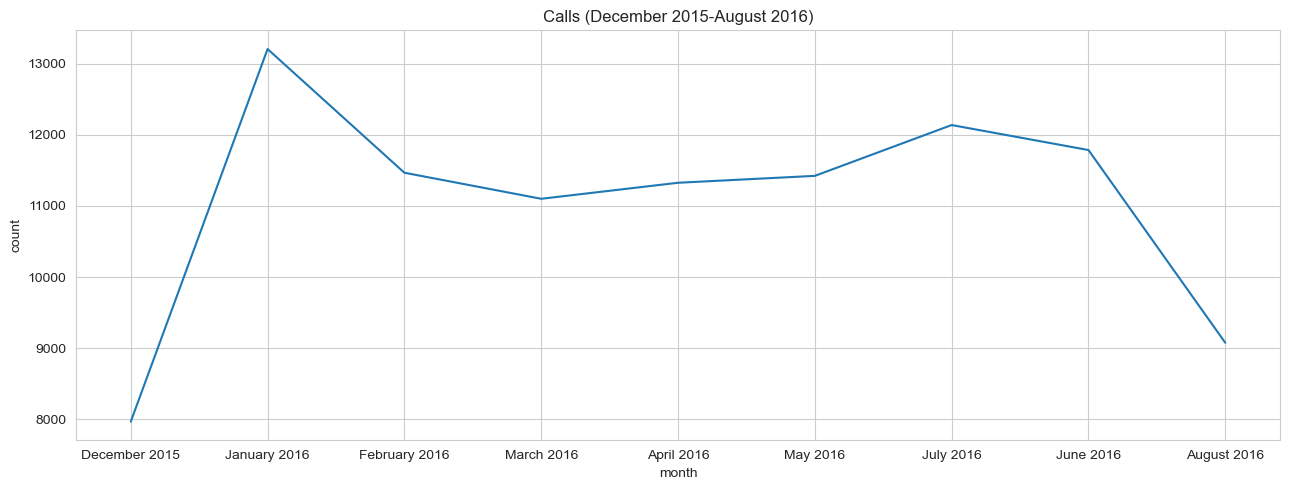

In [16]:
plt.figure(figsize=(13,5))
sns.lineplot(x='month',y='timeStamp',data=NumEme)
plt.title('Calls (December 2015-August 2016)')
plt.ylabel('count')
plt.tight_layout()

Most emergency calls were made in January 2016 and least emergency calls were made in December 2015.

### Emergencies by type across the time period
The graph below shows the number of emergencies across the time period according to the type of emergency.

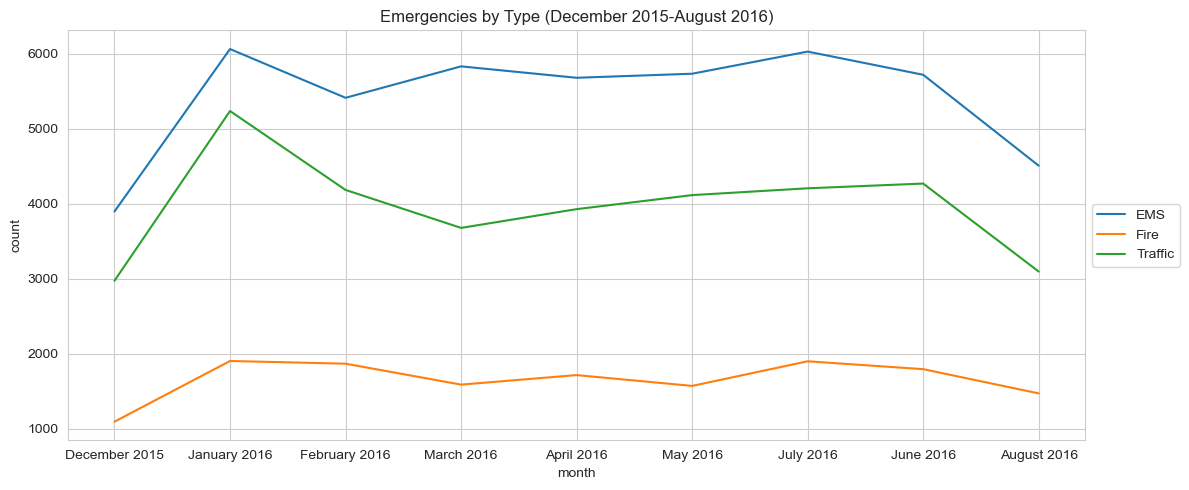

In [17]:
numEMS = calls[calls['type'] == 'EMS'].groupby('month').count().sort_values(
    'month', key=lambda x: x.map(custom_dict))
# Number of Emergencies (EMS)

numFire = calls[calls['type'] == 'Fire'].groupby('month').count().sort_values(
    'month', key=lambda x: x.map(custom_dict))
# Number of Emergencies (Fire)

numTraffic = calls[calls['type'] == 'Traffic'].groupby('month').count().sort_values(
    'month', key=lambda x: x.map(custom_dict))
# Number of Emergencies (Traffic)


plt.figure(figsize=(12, 5))
EMS = sns.lineplot(x='month', y='timeStamp', data=numEMS, label='EMS')
Fire = sns.lineplot(x='month', y='timeStamp', data=numFire, label='Fire')
Traffic = sns.lineplot(x='month', y='timeStamp',
                       data=numTraffic, label='Traffic')
plt.title('Emergencies by Type (December 2015-August 2016)')
plt.ylabel('count')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

Most emergency calls for EMS,Fire and Traffic were made in January 2016 and the lowest calls were made in December 2015.

### Linear Trend of the Number of Calls across the Time Period
The graph below shows the linear trend of the number of calls as time passes

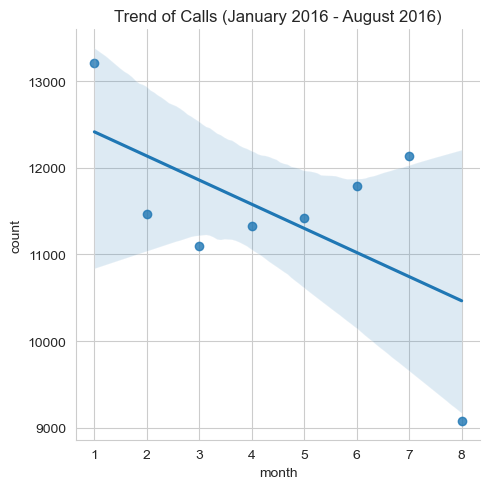

In [18]:
custom_dict1 = {12: 0}
            # Arrange the data by months
    

NumEme1 = calls.groupby('monthnum').count().sort_values(
    'monthnum', key=lambda x: x.map(custom_dict1))
NumEme1.drop(12,inplace=True)

sns.lmplot(x='monthnum',y='timeStamp',data=NumEme1.reset_index())
plt.title('Trend of Calls (January 2016 - August 2016)')
plt.ylabel('count')
plt.xlabel('month')
plt.tight_layout()

As seen above, The number of calls has a downward trend meaning that as months pass in the year,the number emergency calls reduce.

### Relationship between Day of the week and Hour 
Below is a heat map showing the relationship between day of the week and hour based on the number of emergency calls made

In [19]:
emeHeat = calls.groupby(['day','hour']).count().unstack()['timeStamp']
emeHeat = emeHeat.iloc[[3,1,5,6,4,0,2],:]

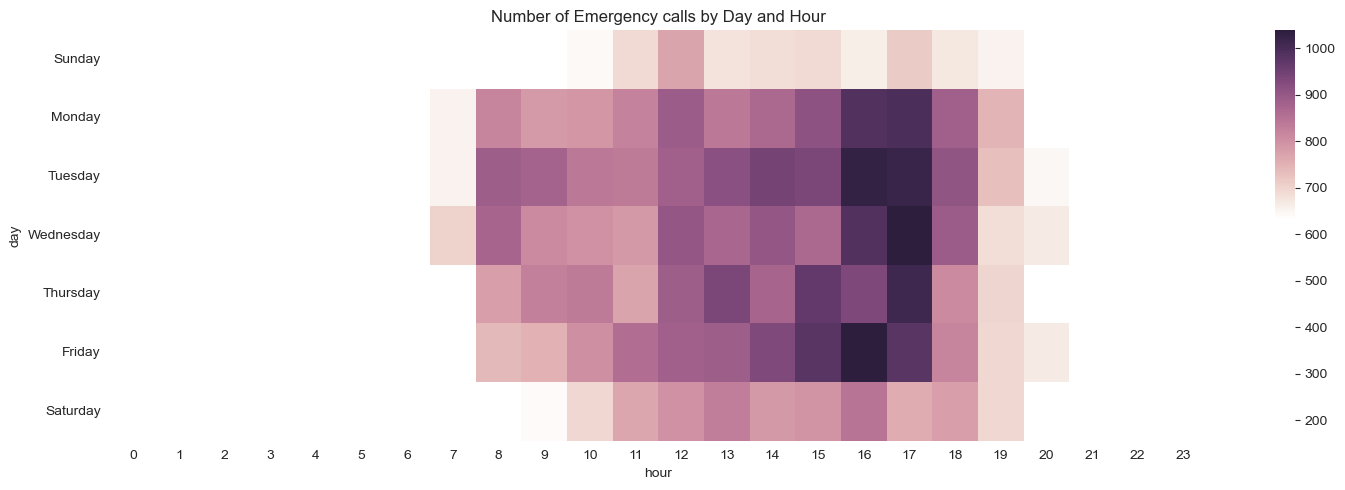

In [79]:
plt.figure(figsize=(15,5))
cmap = sns.cubehelix_palette(light=2, as_cmap=True)
sns.heatmap(emeHeat, cmap= cmap)
plt.title('Number of Emergency calls by Day and Hour')
plt.tight_layout()

As seen above, 7 AM to 8 PM are periods where most emergency calls are made especially between 3 PM and 5 PM Mondays to Fridays.

### Relationship between Day of the week and Month
Below is a heat map showing the relationship between day of the week and month based on the number of emergency calls made

In [21]:
emeHeatm = calls.groupby(['day','month']).count().unstack()['timeStamp']
emeHeatm = emeHeatm.iloc[[3,1,5,6,4,0,2],[2,4,3,7,0,8,6,5,1]]  #Arrange by Day and Month

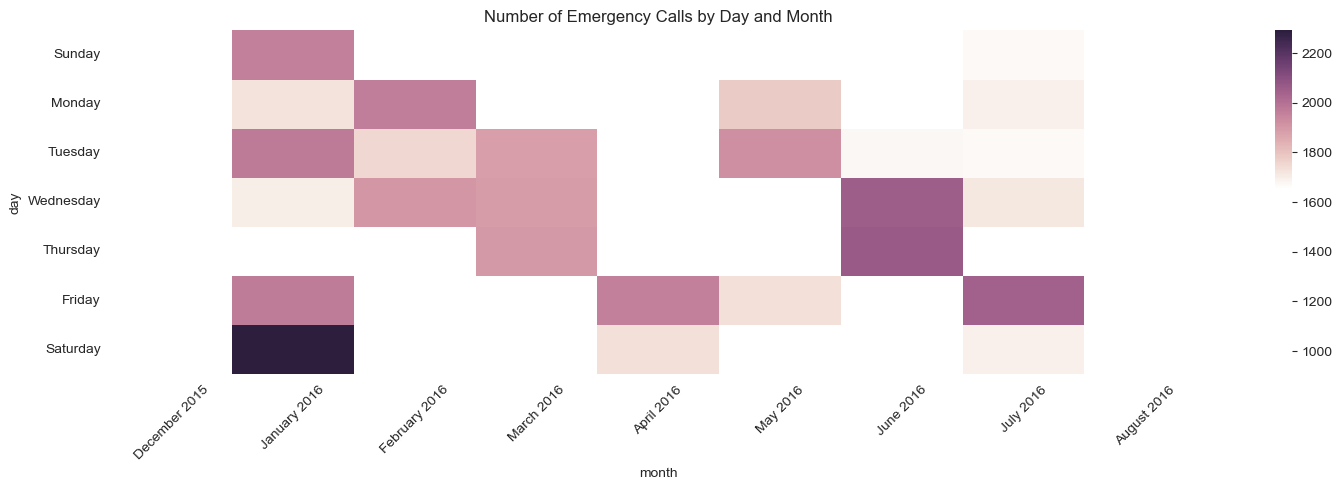

In [83]:
plt.figure(figsize=(15,5))
sns.heatmap(emeHeatm,cmap=cmap)
plt.title('Number of Emergency Calls by Day and Month')
plt.xticks(rotation=45)
plt.tight_layout()

As seen above, Most emergency calls were made on the Saturdays of January 2016.

### Reasons for Emergency calls
Below is a graph showing the top 3 reasons for 911 calls across the three different types of emergency calls.

In [70]:
emsRes = emsRes.groupby('month').count().sort_values(
    'month', key=lambda x: x.map(custom_dict))
emsCar = emsCar.groupby('month').count().sort_values(
    'month', key=lambda x: x.map(custom_dict))
emsFal = emsFal.groupby('month').count().sort_values(
    'month', key=lambda x: x.map(custom_dict))
# Number of EMS emergencies by reason


traVeh = traVeh.groupby('month').count().sort_values(
    'month', key=lambda x: x.map(custom_dict))
traDis = traDis.groupby('month').count().sort_values(
    'month', key=lambda x: x.map(custom_dict))
traRoa = traRoa.groupby('month').count().sort_values(
    'month', key=lambda x: x.map(custom_dict))
# Number of Traffic emergencies by reason


firFir = firFir.groupby('month').count().sort_values(
    'month', key=lambda x: x.map(custom_dict))
firVeh = firVeh.groupby('month').count().sort_values(
    'month', key=lambda x: x.map(custom_dict))
firInv = firInv.groupby('month').count().sort_values(
    'month', key=lambda x: x.map(custom_dict))
# Number of Fire emergencies by reason

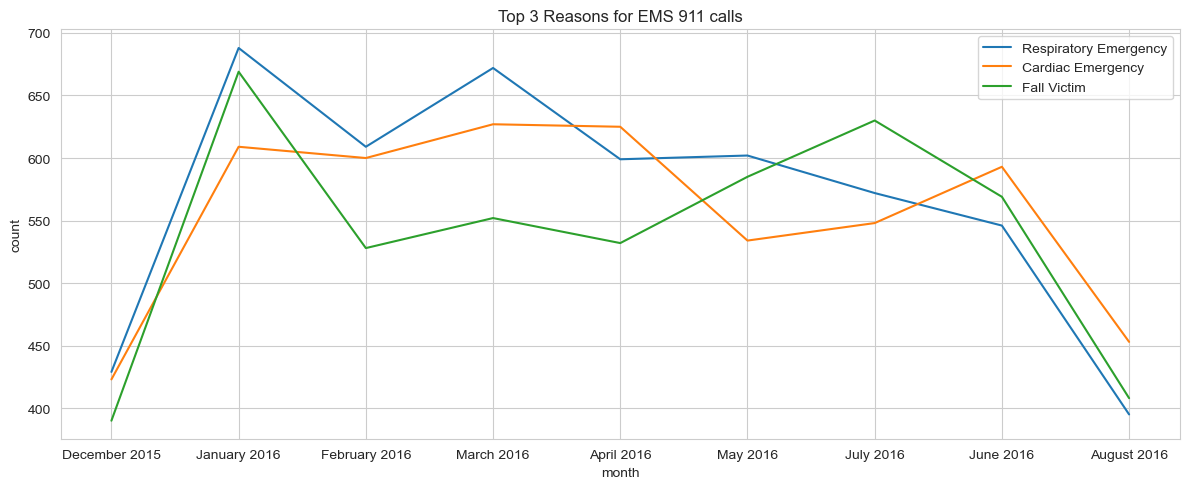

In [76]:
plt.figure(figsize=(12, 5))
EMSRES = sns.lineplot(x='month', y='timeStamp', data=emsRes, label='Respiratory Emergency')
EMSCAR = sns.lineplot(x='month', y='timeStamp', data=emsCar, label='Cardiac Emergency')
EMSFAL = sns.lineplot(x='month', y='timeStamp', data=emsFal, label='Fall Victim')
plt.title('Top 3 Reasons for EMS 911 calls')
plt.ylabel('count')
plt.tight_layout()

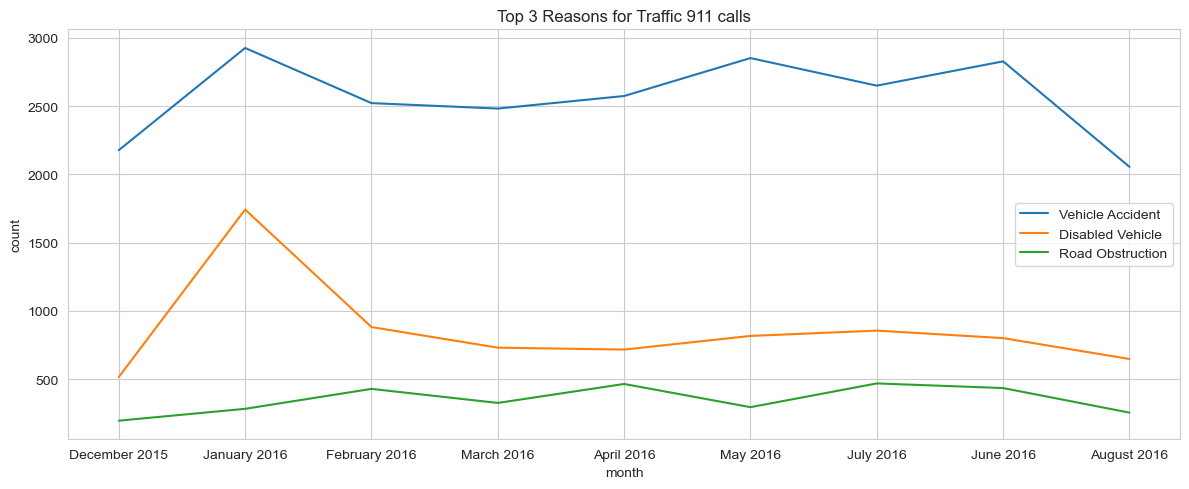

In [77]:
plt.figure(figsize=(12, 5))
TRAVEH = sns.lineplot(x='month', y='timeStamp', data=traVeh, label='Vehicle Accident')
TRADIS = sns.lineplot(x='month', y='timeStamp', data=traDis, label='Disabled Vehicle')
TRAROA = sns.lineplot(x='month', y='timeStamp', data=traRoa, label='Road Obstruction')
plt.title('Top 3 Reasons for Traffic 911 calls')
plt.ylabel('count')
plt.tight_layout()

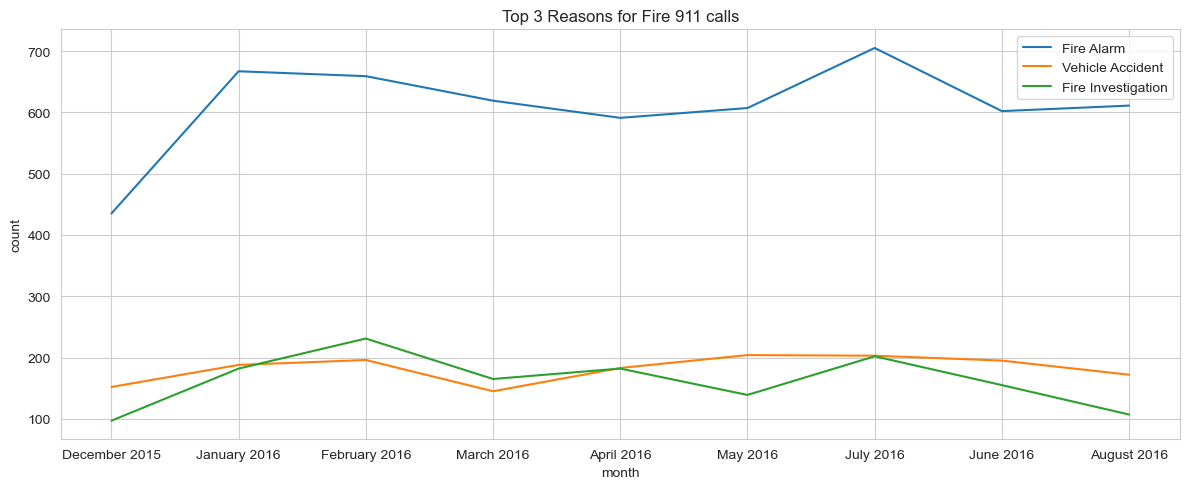

In [78]:
plt.figure(figsize=(12, 5))
FIRFIR = sns.lineplot(x='month', y='timeStamp', data=firFir, label='Fire Alarm')
FIRVEH = sns.lineplot(x='month', y='timeStamp', data=firVeh, label='Vehicle Accident')
FIRINV = sns.lineplot(x='month', y='timeStamp', data=firInv, label='Fire Investigation')

plt.title('Top 3 Reasons for Fire 911 calls')
plt.ylabel('count')
plt.tight_layout()